In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread

np.set_printoptions(precision = 2)
np.set_printoptions(suppress  = True)

In [2]:
def normalize(img):
    img_cop  = img.copy()
    img_cop  = img_cop.astype('float64') 
    img_min  = np.min(img_cop)
    img_max  = np.max(img_cop)
    img_cop  = (img_cop - img_min)/(img_max - img_min)
    return img_cop

In [3]:
img = (255*normalize(imread('multi_recorte_2.png'))).astype('uint8')[:,:,0]

img_pred  = img.copy()

# Convert the image to grayscale
img_pred_gauss = gray_blurred = cv2.GaussianBlur(img_pred, (15, 15), 0)

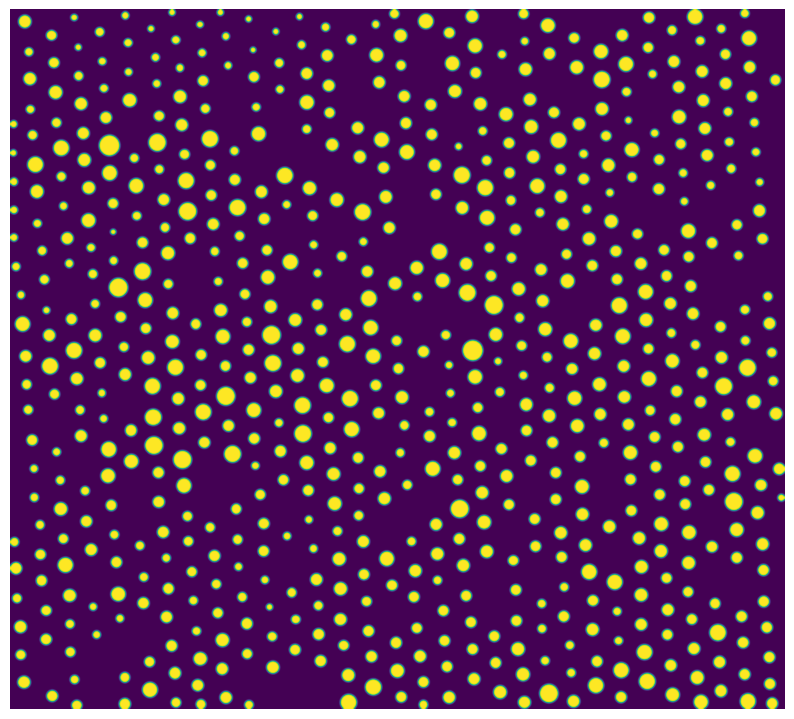

In [4]:
fig, axs = plt.subplots(figsize = (10,10))
axs.imshow(img_pred_gauss)
axs.axis('off')
plt.show()

In [5]:
# Use the HoughCircles method to detect circles
circles = cv2.HoughCircles(
    img_pred_gauss,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

output = np.zeros(img.shape, dtype = 'float32')

# Ensure at least some circles were found
if circles is not None:
    # Convert the circle parameters (x, y, radius) to integers
    circles = np.round(circles[0, :]).astype("int")

    # Loop over the detected circles
    for (x, y, r) in circles:
        # Draw the circle in the output image
        cv2.circle(output, (x, y), r, (255, 255, 255), 2)


    # Print the number of circles detected
    print(f"Number of circles detected: {len(circles)}")

Number of circles detected: 667


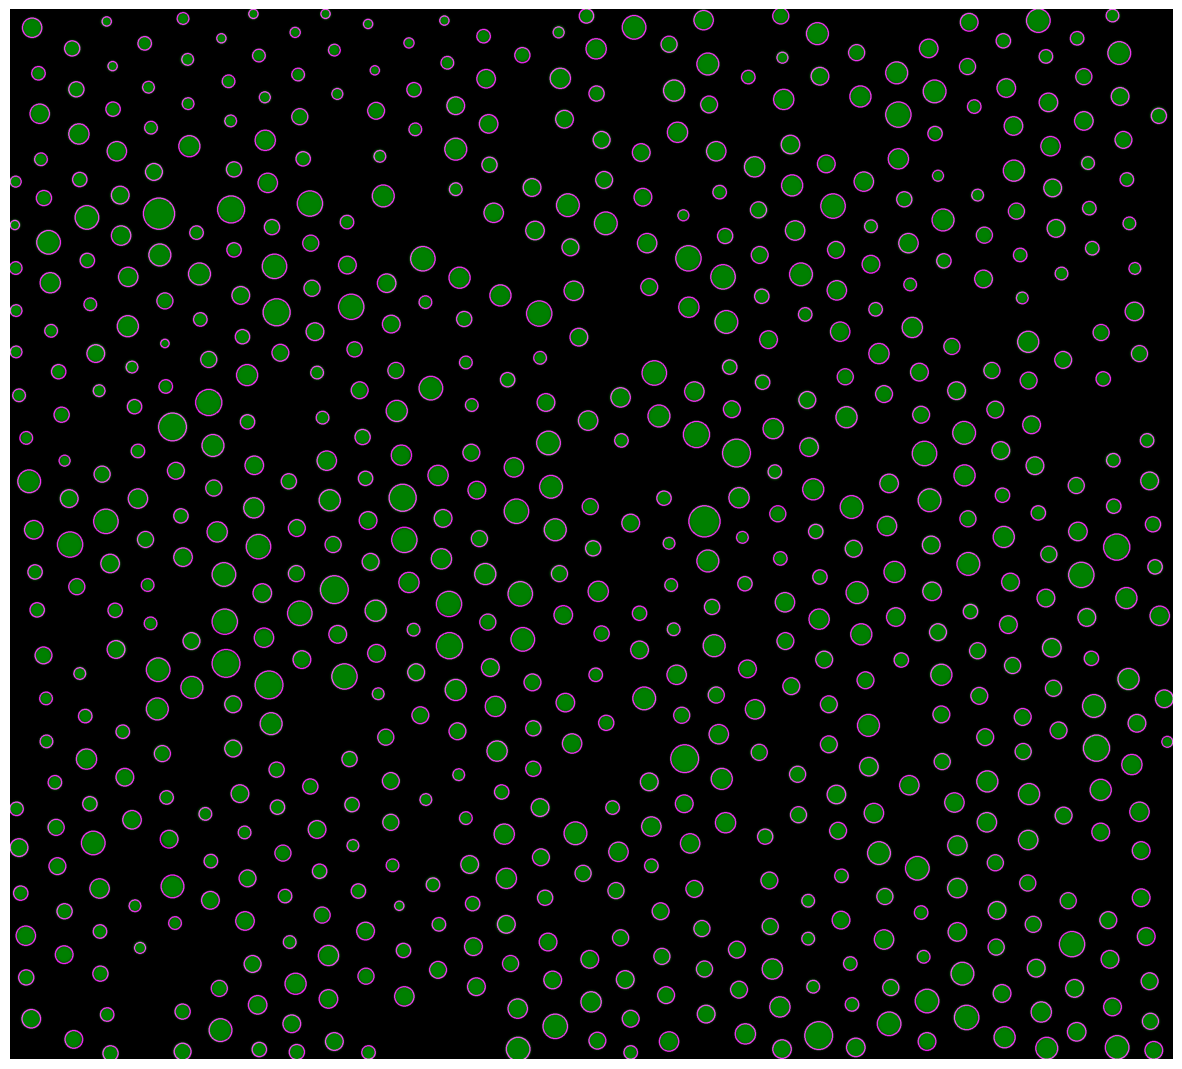

In [6]:
img3     = output
img4     = img_pred_gauss
img_all  = np.dstack((img3,img4,img3))

fig, axs = plt.subplots(figsize = (15,15))
axs.imshow(img_all/np.max(img_all))
axs.axis('off')
plt.show()